In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# 1. Data읽기

In [2]:
data = pd.read_csv('data_week12.csv')
data

,Number of times pregnant.,Plasma glucose concentration a 2 hours in an oral glucose tolerance test.,Diastolic blood pressure (mm Hg).,Triceps skinfold thickness (mm).,2-Hour serum insulin (mu U/ml).,Body mass index (weight in kg/(height in m)^2).,Diabetes pedigree function.,Age (years).,Class variable (0 or 1).
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


# 2. 데이터셋 분류 
* x : input variable
* y : output variable 
* test_size : 훈련 / 테스트 데이터 분류 비율   
    train data: 0.75 / test data가 0.25
* random_state : 항상 동일한 결과를 얻기 위해 설정  
 

In [3]:
header = []
for i in data:
    header.append(i)

    x = data[header[0:-1]]
    y = data[header[-1]]  #데이터셋 분류: x=input variable, y=output variable

    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.25, shuffle=42, random_state=42)  #데이터셋 학습용/테스트용 나눔

# 3. 가우시안네이브베이즈이용한 분류 모델 

In [4]:
from sklearn.naive_bayes import GaussianNB  #가우시안 나이브베이즈
model = GaussianNB()

## 3.1 모델 학습 및 분류 결과

In [5]:
#분류 모델 학습 
model.fit(x_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(x_test)) 

[분류 결과] 
 [0 0 0 0 1 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0
 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 1
 0 0 0 1 1 0 0]


## 3.2 모델 정확도 

In [6]:
print('test accuracy :', model.score(x_test, y_test))  

test accuracy : 0.734375


## 3.3 분류 과정 및 결과

In [7]:
# train data에서 0,1에 속하는 표본의 수
print('학습 데이터에서 0의 개수:', int(model.class_count_[0]),'개')
print('학습 데이터에서 1의 개수:', int(model.class_count_[1]),'개')

학습 데이터에서 0의 개수: 377 개
학습 데이터에서 1의 개수: 199 개


In [8]:
# [0이 나올 확률, 1이 나올 확률] : 확률값이 더 큰쪽으로 분류됨.
result = []
for i in model.predict_proba(x_test):
    if i[0] > i[1]:
        print('0 확률 : ', round(i[0], 3), '1 확률:', round(i[1], 3), '    분류: 0')
        result.append(0)
    else:
        print('0 확률 : ', round(i[0], 3), '1 확률:', round(i[1], 3), '    분류: 1')
        result.append(1)

0 확률 :  0.731 1 확률: 0.269     분류: 0
0 확률 :  0.941 1 확률: 0.059     분류: 0
0 확률 :  0.973 1 확률: 0.027     분류: 0
0 확률 :  0.837 1 확률: 0.163     분류: 0
0 확률 :  0.462 1 확률: 0.538     분류: 1
0 확률 :  0.465 1 확률: 0.535     분류: 1
0 확률 :  0.996 1 확률: 0.004     분류: 0
0 확률 :  0.488 1 확률: 0.512     분류: 1
0 확률 :  0.543 1 확률: 0.457     분류: 0
0 확률 :  0.224 1 확률: 0.776     분류: 1
0 확률 :  0.735 1 확률: 0.265     분류: 0
0 확률 :  0.021 1 확률: 0.979     분류: 1
0 확률 :  0.346 1 확률: 0.654     분류: 1
0 확률 :  0.734 1 확률: 0.266     분류: 0
0 확률 :  0.978 1 확률: 0.022     분류: 0
0 확률 :  0.688 1 확률: 0.312     분류: 0
0 확률 :  0.944 1 확률: 0.056     분류: 0
0 확률 :  0.971 1 확률: 0.029     분류: 0
0 확률 :  0.12 1 확률: 0.88     분류: 1
0 확률 :  0.714 1 확률: 0.286     분류: 0
0 확률 :  0.873 1 확률: 0.127     분류: 0
0 확률 :  0.964 1 확률: 0.036     분류: 0
0 확률 :  0.101 1 확률: 0.899     분류: 1
0 확률 :  0.975 1 확률: 0.025     분류: 0
0 확률 :  0.344 1 확률: 0.656     분류: 1
0 확률 :  0.043 1 확률: 0.957     분류: 1
0 확률 :  0.965 1 확률: 0.035     분류: 0
0 확률 :  0.992 1 확률: 0.008     

In [9]:
T, F = [], []
for n in range(len(y_test)):
    if result[n] == list(y_test)[n]:
        T.append(list(y_test.index)[n])
    else:
        F.append(list(y_test.index)[n])

print('[분류 성공 index] \n', T,'\n 개수 : ',len(T),'\n\n')

print('[분류 실패 index] \n', F,'\n 개수 : ',len(F)) 
print('정확도(성공/전체) =',len(T)/(len(T)+len(F)))

[분류 성공 index] 
 [668, 324, 624, 690, 97, 568, 199, 265, 760, 501, 457, 604, 636, 544, 208, 209, 581, 639, 431, 120, 363, 425, 300, 338, 579, 482, 456, 30, 635, 33, 31, 39, 77, 299, 629, 516, 375, 511, 234, 494, 692, 404, 754, 764, 254, 483, 210, 84, 239, 409, 720, 512, 587, 734, 396, 528, 10, 192, 174, 428, 181, 748, 155, 65, 331, 137, 350, 81, 405, 470, 250, 490, 220, 76, 290, 72, 244, 394, 620, 63, 716, 314, 118, 728, 49, 662, 411, 605, 227, 168, 513, 196, 275, 383, 101, 259, 193, 2, 215, 382, 648, 606, 714, 691, 603, 617, 79, 694, 433, 677, 133, 55, 725, 355, 534, 344, 296, 462, 60, 618, 346, 231, 340, 306, 718, 90, 377, 235, 158, 69, 131, 640, 135, 583, 746, 292, 136, 432, 554, 319, 615] 
 개수 :  141 


[분류 실패 index] 
 [473, 204, 336, 148, 667, 212, 356, 213, 86, 281, 328, 67, 66, 582, 78, 487, 451, 361, 519, 211, 54, 109, 362, 448, 309, 468, 548, 659, 7, 23, 763, 706, 549, 731, 486, 218, 294, 535, 260, 44, 70, 264, 673, 286, 745, 165, 164, 28, 608, 594, 6] 
 개수 :  51
정확도(성공/전체) = 0

## 3.4 Confusion Matrix & Performances

[[94 29]
 [22 47]]


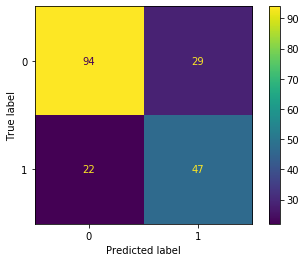

In [10]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_true = list(y_test)
y_pred = result
print(confusion_matrix(y_true, y_pred))

plot_confusion_matrix(model, x_test, y_test)  


In [11]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(tn, fp, fn, tp)
pre = tp/(tp+fp)
rec =  tp/(tp+fn)
acc = (tp+tn)/(tp+fp+fn+tn)
F = 2*(pre*rec) / (pre+rec)
print('Precision = ', round(pre,4))
print('Recall = ', round(rec,4))
print('Accuracy = ', round(acc,4))
print('F-measure = ',round(F,4))

94 29 22 47
Precision =  0.6184
Recall =  0.6812
Accuracy =  0.7344
F-measure =  0.6483


## [참고] train/test Data set 

In [12]:
# train data set
data.iloc[x_train.index,:]

,Number of times pregnant.,Plasma glucose concentration a 2 hours in an oral glucose tolerance test.,Diastolic blood pressure (mm Hg).,Triceps skinfold thickness (mm).,2-Hour serum insulin (mu U/ml).,Body mass index (weight in kg/(height in m)^2).,Diabetes pedigree function.,Age (years).,Class variable (0 or 1).
357,13,129,0,30,0,39.9,0.569,44,1
73,4,129,86,20,270,35.1,0.231,23,0
352,3,61,82,28,0,34.4,0.243,46,0
497,2,81,72,15,76,30.1,0.547,25,0
145,0,102,75,23,0,0.0,0.572,21,0
...,...,...,...,...,...,...,...,...,...
71,5,139,64,35,140,28.6,0.411,26,0
106,1,96,122,0,0,22.4,0.207,27,0
270,10,101,86,37,0,45.6,1.136,38,1
435,0,141,0,0,0,42.4,0.205,29,1


In [13]:
# test data set
data.iloc[x_test.index,:]

,Number of times pregnant.,Plasma glucose concentration a 2 hours in an oral glucose tolerance test.,Diastolic blood pressure (mm Hg).,Triceps skinfold thickness (mm).,2-Hour serum insulin (mu U/ml).,Body mass index (weight in kg/(height in m)^2).,Diabetes pedigree function.,Age (years).,Class variable (0 or 1).
668,6,98,58,33,190,34.0,0.430,43,0
324,2,112,75,32,0,35.7,0.148,21,0
624,2,108,64,0,0,30.8,0.158,21,0
690,8,107,80,0,0,24.6,0.856,34,0
473,7,136,90,0,0,29.9,0.210,50,0
...,...,...,...,...,...,...,...,...,...
554,1,84,64,23,115,36.9,0.471,28,0
319,6,194,78,0,0,23.5,0.129,59,1
594,6,123,72,45,230,33.6,0.733,34,0
6,3,78,50,32,88,31.0,0.248,26,1


# 4. 로지스틱회귀 이용한 분류 모델

In [14]:
from sklearn.linear_model import LogisticRegression #로지스틱회귀
from sklearn.model_selection import train_test_split #데이터셋 학습용/테스트용 나누기

In [15]:
model = LogisticRegression() 

##  4.1 데이터셋 분류
* x : input variable
* y : output variable
* test_size : 훈련 / 테스트 데이터 분류 비율  
    train data: 0.75 / test data가 0.25
* random_state : 항상 동일한 결과를 얻기 위해 설정


In [16]:
header = []
for i in data:
    header.append(i)
    
    x = data[header[0:-1]]
    y = data[header[-1]]     #데이터셋 분류: x=input variable, y=output variable
    
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25,shuffle =42, random_state =0) #데이터셋 학습용/테스트용 나눔

## 4.2 모델 학습 및 분류 결과

In [17]:
#분류 모델 학습 
model.fit(x_train, y_train)  

#분류 결과
print('[분류 결과] \n', model.predict(x_test)) 

[분류 결과] 
 [1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


## 4.3 모델 정확도 


In [18]:
print('테스트 정확도 :', model.score(x_test, y_test))  

테스트 정확도 : 0.7916666666666666


## 4.4 각 변수의 계수 확인

In [19]:
for n in range(len(x_test.columns)):
    print(x_test.columns[n],'계수:', model.coef_[0][n]) 

Number of times pregnant. 계수: 0.10310804532776657
Plasma glucose concentration a 2 hours in an oral glucose tolerance test. 계수: 0.03481551791807547
Diastolic blood pressure (mm Hg). 계수: -0.011579491020247003
Triceps skinfold thickness (mm). 계수: 0.009559540619208254
2-Hour serum insulin (mu U/ml). 계수: -0.0013291259207863526
Body mass index (weight in kg/(height in m)^2). 계수: 0.0776372512136751
Diabetes pedigree function. 계수: 1.2704553364082087
Age (years). 계수: 0.021569548775888802


## 4.5 분류 결과

In [20]:
# [0이 나올 확률, 1이 나올 확률] : 확률값이 더 큰쪽으로 분류됨.
result = []
for i in model.predict_proba(x_test):
    if i[0] > i[1]:
        print('0 확률 : ', round(i[0], 3), '1 확률:', round(i[1], 3), '    분류: 0')
        result.append(0)
    else:
        print('0 확률 : ', round(i[0], 3), '1 확률:', round(i[1], 3), '    분류: 1')
        result.append(1)

0 확률 :  0.026 1 확률: 0.974     분류: 1
0 확률 :  0.84 1 확률: 0.16     분류: 0
0 확률 :  0.923 1 확률: 0.077     분류: 0
0 확률 :  0.32 1 확률: 0.68     분류: 1
0 확률 :  0.878 1 확률: 0.122     분류: 0
0 확률 :  0.966 1 확률: 0.034     분류: 0
0 확률 :  0.196 1 확률: 0.804     분류: 1
0 확률 :  0.103 1 확률: 0.897     분류: 1
0 확률 :  0.49 1 확률: 0.51     분류: 1
0 확률 :  0.635 1 확률: 0.365     분류: 0
0 확률 :  0.358 1 확률: 0.642     분류: 1
0 확률 :  0.03 1 확률: 0.97     분류: 1
0 확률 :  0.683 1 확률: 0.317     분류: 0
0 확률 :  0.746 1 확률: 0.254     분류: 0
0 확률 :  0.867 1 확률: 0.133     분류: 0
0 확률 :  0.822 1 확률: 0.178     분류: 0
0 확률 :  0.102 1 확률: 0.898     분류: 1
0 확률 :  0.978 1 확률: 0.022     분류: 0
0 확률 :  0.532 1 확률: 0.468     분류: 0
0 확률 :  0.748 1 확률: 0.252     분류: 0
0 확률 :  0.316 1 확률: 0.684     분류: 1
0 확률 :  0.611 1 확률: 0.389     분류: 0
0 확률 :  0.783 1 확률: 0.217     분류: 0
0 확률 :  0.942 1 확률: 0.058     분류: 0
0 확률 :  0.95 1 확률: 0.05     분류: 0
0 확률 :  0.643 1 확률: 0.357     분류: 0
0 확률 :  0.953 1 확률: 0.047     분류: 0
0 확률 :  0.057 1 확률: 0.943     분류: 1
0 

In [21]:
T, F = [], []
for n in range(len(y_test)):
    if result[n] == list(y_test)[n]:
        T.append(list(y_test.index)[n])
    else:
        F.append(list(y_test.index)[n])

print('[분류 성공 index] \n', T,'\n 개수 : ',len(T),'\n\n')

print('[분류 실패 index] \n', F,'\n 개수 : ',len(F)) 

[분류 성공 index] 
 [661, 122, 113, 14, 529, 103, 338, 588, 204, 31, 546, 278, 593, 737, 202, 175, 55, 479, 365, 417, 172, 352, 27, 605, 239, 79, 496, 422, 640, 385, 404, 500, 575, 181, 354, 563, 399, 8, 145, 271, 578, 142, 215, 452, 75, 1, 662, 364, 626, 266, 317, 408, 355, 272, 250, 403, 624, 222, 253, 235, 351, 672, 720, 556, 583, 150, 85, 526, 735, 350, 18, 236, 623, 602, 251, 313, 50, 572, 608, 39, 162, 156, 10, 68, 736, 471, 316, 2, 760, 586, 187, 415, 283, 279, 249, 740, 725, 362, 318, 582, 413, 694, 698, 456, 728, 71, 49, 210, 409, 503, 687, 261, 653, 331, 196, 76, 671, 52, 310, 416, 482, 230, 527, 380, 603, 118, 157, 193, 306, 319, 97, 530, 518, 632, 524, 536, 597, 462, 241, 344, 302, 704, 240, 691, 490, 45, 750, 62, 78, 382, 140, 463] 
 개수 :  152 


[분류 실패 index] 
 [395, 577, 744, 285, 374, 648, 40, 419, 198, 683, 756, 303, 451, 706, 622, 499, 242, 548, 638, 406, 267, 443, 214, 258, 386, 37, 48, 568, 64, 476, 247, 468, 327, 619, 17, 739, 263, 170, 366, 301] 
 개수 :  40


## 4.6 Confusion Matrix & Performances

[[115  15]
 [ 25  37]]


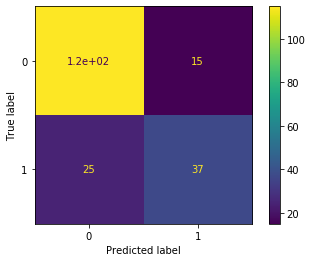

In [22]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
y_true = list(y_test)
y_pred = result
print(confusion_matrix(y_true, y_pred))

plot_confusion_matrix(model, x_test, y_test)  


In [23]:
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
print(tn, fp, fn, tp)
pre = tp/(tp+fp)
rec =  tp/(tp+fn)
acc = (tp+tn)/(tp+fp+fn+tn)
F = 2*(pre*rec) / (pre+rec)
print('Precision = ', round(pre,4))
print('Recall = ', round(rec,4))
print('Accuracy = ', round(acc,4))
print('F-measure = ',round(F,4))

115 15 25 37
Precision =  0.7115
Recall =  0.5968
Accuracy =  0.7917
F-measure =  0.6491


### 4.7 [data set 참고]

In [24]:
# train data set
data.iloc[x_train.index,:]


,Number of times pregnant.,Plasma glucose concentration a 2 hours in an oral glucose tolerance test.,Diastolic blood pressure (mm Hg).,Triceps skinfold thickness (mm).,2-Hour serum insulin (mu U/ml).,Body mass index (weight in kg/(height in m)^2).,Diabetes pedigree function.,Age (years).,Class variable (0 or 1).
762,9,89,62,0,0,22.5,0.142,33,0
127,1,118,58,36,94,33.3,0.261,23,0
564,0,91,80,0,0,32.4,0.601,27,0
375,12,140,82,43,325,39.2,0.528,58,1
663,9,145,80,46,130,37.9,0.637,40,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
192,7,159,66,0,0,30.4,0.383,36,1
629,4,94,65,22,0,24.7,0.148,21,0
559,11,85,74,0,0,30.1,0.300,35,0


In [25]:
# test data set
data.iloc[x_test.index,:]

,Number of times pregnant.,Plasma glucose concentration a 2 hours in an oral glucose tolerance test.,Diastolic blood pressure (mm Hg).,Triceps skinfold thickness (mm).,2-Hour serum insulin (mu U/ml).,Body mass index (weight in kg/(height in m)^2).,Diabetes pedigree function.,Age (years).,Class variable (0 or 1).
661,1,199,76,43,0,42.9,1.394,22,1
122,2,107,74,30,100,33.6,0.404,23,0
113,4,76,62,0,0,34.0,0.391,25,0
14,5,166,72,19,175,25.8,0.587,51,1
529,0,111,65,0,0,24.6,0.660,31,0
...,...,...,...,...,...,...,...,...,...
366,6,124,72,0,0,27.6,0.368,29,1
301,2,144,58,33,135,31.6,0.422,25,1
382,1,109,60,8,182,25.4,0.947,21,0
140,3,128,78,0,0,21.1,0.268,55,0


# 결론

## [네이브베이즈 분류]
* Precision =  0.6184  
* Recall =  0.6812  
* Accuracy =  0.7344  
* F-measure =  0.6483  
* 네이브베이즈 분류의 정확도는 0.7344이다. 


## [로지스틱회귀]
* Precision =  0.7115  
* Recall =  0.5968  
* Accuracy =  0.7917  
* F-measure =  0.6491  
로지스틱회귀를 이용한 분류의 정확도는 0.7917이다.

따라서 로지스틱회귀를 이용한 분류가 더 정확도가 높게 나왔다.